In [16]:
from matplotlib import pyplot as plt
import pandas as pd
import math

# ipca de desemprego em relação a inflação, de 2012 a 2021
# Assunto: Regressão Linear Simples
# Observa-se que para esse exemplo o modelo utilizado não é adequado,
# visto que o coeficiente de correlação é próximo ao zero.

# Pega os dados da planilha
dados = pd.read_excel("DesempregoxInflacao.xlsx")
taxa = dados['desemprego']
ipca = dados['ipca']

# Calcula o coeficiente de relação (r)
somatorio_ipca_taxa = 0
somatorio_ipca_quadrado = 0
somatorio_taxa_quadrado = 0
for i in range (len(ipca)):
  somatorio_ipca_taxa += (ipca[i] * taxa[i])
  somatorio_ipca_quadrado += (ipca[i]**2)
  somatorio_taxa_quadrado += (taxa[i]**2)
soma_taxa = sum(taxa)
soma_ipca = sum(ipca)
n=len(taxa)
r_numerador = (somatorio_ipca_taxa * n)-(soma_ipca * soma_taxa)
r_denominador = math.sqrt(((n * somatorio_taxa_quadrado) - (soma_taxa**2)) * (n*somatorio_ipca_quadrado - (soma_ipca**2)))
r = r_numerador/r_denominador

# Verifica o coeficiente de relação (r)

print("r = ", round(r, 4))
r = abs(r)
if(r > 0 and r <= 0.3):
  print("Correlação fraca")
elif(r > 0.3 and r <= 0.6):
  print("Correlação media")
elif(r > 0.6 and r <= 0.9 ):
  print("Correlação forte")
elif(r > 0.9 and r <= 0.99):
  print("Correlação fortissima")
elif(r > 0.99):
  print("Correlação perfeita")
else:
  print("Correlação nula")

# # Verifica se o modelo é adequado (r2 ou r²)
r2 = r**2
print("r² = ", round(r2, 4))
if(r2 >= 1):
  print("O modelo adotado explica a realidade com perfeição")
elif(r2 == 0):
  print("O modelo adotado não explica nada a realidade")

r =  -0.1183
Correlação fraca
r² =  0.014


In [17]:
# # Calcula o coeficiente de regressão B
b_numerador = somatorio_ipca_taxa - ((soma_ipca * soma_taxa)/n)
b_denominador = somatorio_taxa_quadrado - ((soma_taxa**2)/n)
b = b_numerador/b_denominador
print("\nb =", b)

# # Calcula o coeficiente de regressão A
x_barra = soma_taxa/n
y_barra = soma_ipca/n
a = y_barra - b * x_barra
print("a =", a)

# # Calcula o modelo de regressão (yr)
yr = a + b * taxa
print("\nyr = {0} + {1} * taxa".format(a, b))

#Encontra o maior e menor valor
v_max = int(max(taxa))
v_min = int(min(taxa))


b = -0.017447825836082946
a = 0.7156533342978892

yr = 0.7156533342978892 + -0.017447825836082946 * taxa


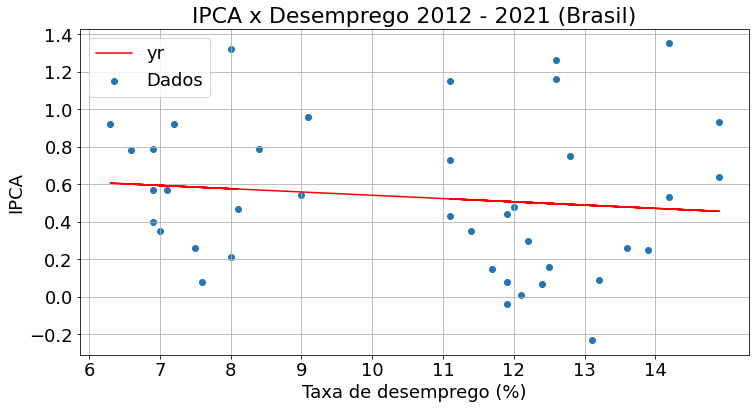

In [18]:
# Função para plotar o gráfico
def grafico():
  plt.figure(figsize=(12,6))
  plt.rcParams['xtick.labelsize'] = 18
  plt.rcParams['ytick.labelsize'] = 18
  plt.rcParams['legend.fontsize'] = 18
  plt.scatter(taxa, ipca, label="Dados")
  plt.plot(taxa, yr, color="red", label="yr")
  plt.xticks(range(v_min, 15))
  plt.title('IPCA x Desemprego 2012 - 2021 (Brasil)', fontsize=22)
  plt.ylabel("IPCA", fontsize=18)
  plt.xlabel("Taxa de desemprego (%)", fontsize=18)
  plt.legend()
  plt.grid()
  plt.show()

grafico()